<a href="https://colab.research.google.com/github/AliyaBadmaeva/PDP/blob/main/Badmaeva_A_A__PDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 35.6 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [2]:
! pip install wordcloud

In [3]:
! pip install tensorflow

In [4]:
! pip install tf-keras

In [5]:
! pip uninstall -y tensorflow && pip install tensorflow-cpu

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 78.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0


In [6]:
import os
import numpy as np
import pandas as pd
#from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import unicodedata
import zipfile
from zipfile import ZipFile
import re
from sklearn.model_selection import train_test_split
import shutil
import tarfile
import tensorflow as tf
import tensorflow.keras
from transformers import BertTokenizer, TFBertForSequenceClassification
import pandas as pd
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [7]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [8]:
import string


In [9]:
import plotly.express as px
import plotly.figure_factory as ff

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [12]:
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [13]:
# ссылка на датасет на Гитхабе
IMDB = 'https://raw.githubusercontent.com/AliyaBadmaeva/imdb/master/IMDB_Dataset.zip'

In [14]:
req = requests.get(IMDB)  # получение доступа к файлу с помощью библиотеки запросов - requests
with open("IMDB_Dataset.zip", "wb") as data:
    data.write(req.content)

In [15]:
with ZipFile("IMDB_Dataset.zip", 'r') as new:  # открываем зип в формате read - чтение
    new.extractall()  # извлекаем содержимое

In [16]:
os.remove('IMDB_Dataset.zip')  # удаление зип-архива

In [17]:
imdb = pd.read_csv('IMDB Dataset.csv')  # чтение данных с помощью юиюлиотеки Pandas
imdb.head(10)  # Первые 10 строк датасета

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
5  Probably my all-time favorite movie, a story o...  positive
6  I sure would like to see a resurrection of a u...  positive
7  This show was an amazing, fresh & innovative i...  negative
8  Encouraged by the positive comments about this...  negative
9  If you like original gut wrenching laughter yo...  positive

In [18]:
imdb.info()  # типы данных для каждого их признаков и количество строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [19]:
imdb.describe()  # статистические данные

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

In [20]:
imdb['sentiment'].value_counts()  # количество данных в целевом признаке

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [21]:
imdb.duplicated().sum()  # количество дублей

np.int64(418)

In [22]:
imdb = imdb.drop_duplicates()  # удаление повторов и перезапись в датасет очищенных от дублей данных

In [23]:
imdb.info()  # посмотрим, успешно ли прошло удаление

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [24]:
imdb['sentiment'].value_counts()  # количество этикеток

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

In [25]:
# Процентное соотношение отзывов
print('Положительные отзывы составляют', f"{(round(len(imdb[imdb['sentiment']=='positive'].value_counts())/len(imdb) * 100,2))} %")
print('Отрицательные отзывы составляют', f"{(round(len(imdb[imdb['sentiment']=='negative'].value_counts())/len(imdb) * 100,2))} %")

Положительные отзывы составляют 50.19 %
Отрицательные отзывы составляют 49.81 %


In [26]:
sns.set(style="darkgrid")  # установим черную сетку для графиков
plt.style.use('dark_background')  # установим черный фон

<Figure size 3000x3000 with 0 Axes>

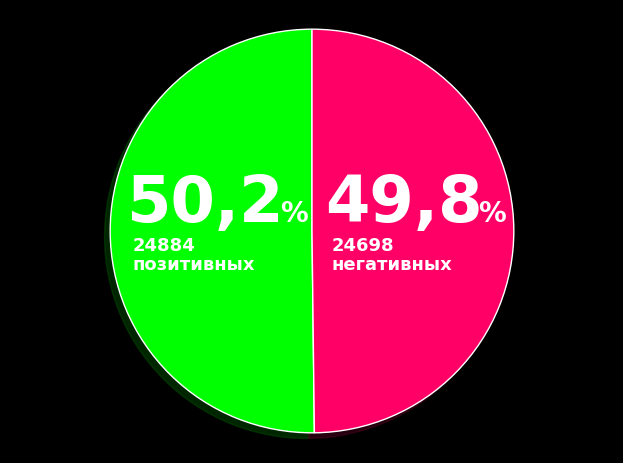

In [27]:
plt.figure(figsize = (30,30))  # Нарисуем пирог
fig, ax = plt.subplots(facecolor='black')  # фон для графика

ax.pie(imdb['sentiment'].value_counts(),  # данные для кусочков пирога
       colors=["#00ff00", "#ff0066"],  # цветовая гамма
       shadow=True,  # тень
       startangle=90,  # угол начала пирога
        pctdistance=(1.2))  # расстояние между центром каждого кусочка пирога и началом текстовой этикетки

# Надписи на пироге
fig.text(0.52, 0.52, '49,8', fontsize=46, fontweight=600, fontfamily='DejaVu Sans', color='w')
fig.text(0.76, 0.52, '%', fontsize=20, fontweight=600, fontfamily='DejaVu Sans', color='w')
fig.text(0.53, 0.46, '24698', fontsize=13, fontweight=700, fontfamily='DejaVu Sans', color='w')
fig.text(0.53, 0.42, 'негативных', fontsize=13, fontweight=700, fontfamily='DejaVu Sans', color='w')
fig.text(0.21, 0.52, '50,2', fontsize=46, fontweight=700, fontfamily='DejaVu Sans', color='w')
fig.text(0.45, 0.52, '%', fontsize=20, fontweight=600, fontfamily='DejaVu Sans', color='w')
fig.text(0.22, 0.46, '24884', fontsize=13, fontweight=700, fontfamily='DejaVu Sans', color='w')
fig.text(0.22, 0.42, 'позитивных', fontsize=13, fontweight=700, fontfamily='DejaVu Sans', color='w')
plt.tight_layout()

# СОхранение фигуры
plt.savefig('percent_of_pos_and_neg_sentiments.png', dpi=100,
        bbox_inches='tight', pad_inches=0.1)
plt.axis('equal')
plt.show();  # показать график

In [28]:
def lower_rev(review):  # функция приведения текста к нижнему регистру
    return review.lower()  # возвратщаемое значение - отзыв в нижнем регистре
imdb['review'] = imdb.review.apply(lambda x: lower_rev(x))

In [29]:
imdb.head(5)  # посомтрим на датасет

review sentiment
0  one of the other reviewers has mentioned that ...  positive
1  a wonderful little production. <br /><br />the...  positive
2  i thought this was a wonderful way to spend ti...  positive
3  basically there's a family where a little boy ...  negative
4  petter mattei's "love in the time of money" is...  positive

In [30]:
# словарь для расшифровки сокращений
translation_mapping = {"ain't": "is not", "isn't": "is not","it's": "it is",
    "aren't": "are not", "can't": "cannot","that's": "that is","there's": "there is",
    "couldn't": "could not","didn't": "did not", "doesn't": "does not",
    "don't": "do not", "hadn't": "had not", "hasn't": "has not","here's": "here is",
    "haven't": "have not", "he's": "he is","how's": "how is", "he'll": "he will",
    "he'd": "he would", "i've": "I have", "i'll": "I will", "i'd": "I would",
    "i'm": "I am", "isn't": "is not", "it's": "it is", "it'll": "it will",
    "it'd": "it would", "let's": "let us", "mightn't": "might not",
    "mustn't": "must not", "shan't": "shall not", "she's": "she is",
    "she'll": "she will", "she'd": "she would", "shouldn't": "should not",
    "that's": "that is", "you'd": "you would","you're": "you are",
    "there's": "there is","you'll": "you will","won't": "will not",
    "they're": "they are","you've": "you have","what's": "what is",
    "they've": "they have","wouldn't": "would not","weren't": "were not",
    "they'll": "they will","we'd": "we would","we'll": "we will",
    "they'd": "they would","where's": "where is","why's": "why is",
    "we're": "we are","when's": "when is","who's": "who is","what's": "what is",
    "we've": "we have"}

In [31]:
StopWords = set(stopwords.words('english'))  # стоп-слова из библиотеки nltk

In [32]:
# функция для удаления стоп-слов
def del_stopwords(review):
    words = review.split()
    cleaned_rev = [word for word in words if word.lower() not in StopWords]
    return ' '.join(cleaned_rev)  # возврщаемое значение - очищенный от стоп-слов отзыв

In [33]:
# функция для очистки отзывов
def clean_review(review):  # функция по очистке отзыва
    # полное написание слов, без сокращений с помощью словаря
    review = ' '.join([translation_mapping[w] if w in translation_mapping
                       else w for w in review.split(" ")])
    tr = str.maketrans('', '', string.punctuation)  # удаление пунктуации
    review = review.translate(tr)  # применение удаления пунктуации
    review = re.sub(r'[^a-zA-Z\s]', '', review)  # удаление чисел и неалфавитных символов
    review = re.sub(r'<[^<]+?>', '', review)  # удаляем HTML-теги
    review = re.sub(r'http\S+|www\S+', '', review)  # очистка отзыва от url
    review = re.sub('\xa0', ' ', review)  # match non-breaking space and replace
    review = re.sub(r'\s+', ' ', review)  # очистка от лишних пробелов
    # удаляем слова, короче 3 символов
    review = ' '.join([word for word in review.split(' ') if len(word) >= 3])

    review = re.sub('\n', ' ', review)  # заменяем переносы строки
    review = del_stopwords(review)  # применяем функцию по удалению стоп-слов
    return review  # возращаем отзыв

# применяем функцию для очистки отзыва, с помощью анонимной функции
imdb['review'] = imdb.review.apply(lambda x: clean_review(x))

In [34]:
# Заменим текстовую этикетку на числовую для целевого признака
imdb['sentiment'] = [0 if each == "negative" else 1 for each in imdb['sentiment']]
imdb.head()  # посмотрим на результат

review  sentiment
0  one reviewers mentioned watching episode hooke...          1
1  wonderful little production filming technique ...          1
2  thought wonderful way spend time hot summer we...          1
3  basically family little boy jake thinks zombie...          0
4  petter matteis love time money visually stunni...          1

In [35]:
# функция по лемматизации - приведение слов к лемме
def lemmatizate_func(review):
    lemmatizer = WordNetLemmatizer()
    words = review.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

imdb['review'] = imdb.review.apply(lambda x: lemmatizate_func(x))

In [36]:
imdb.head()

review  sentiment
0  one reviewer mentioned watching episode hooked...          1
1  wonderful little production filming technique ...          1
2  thought wonderful way spend time hot summer we...          1
3  basically family little boy jake think zombie ...          0
4  petter matteis love time money visually stunni...          1

In [37]:
# генерация n-грамм
def gen_ngrams(review, n_gram):  # параметры - отзыв и количество n-грамм
    # Токенизация текста, удаление пустых строк и стоп-слов
    token = [token for token in review.split(' ') if token != '' if token not in STOPWORDS]

    # Генерация n-грамм с использованием метода скользящего окна
    ngrams = zip(*[token[i:] for i in range(n_gram)])

    # Комбинация n-грамм в лист строк
    return [' '.join(ngram) for ngram in ngrams]

In [38]:
pos_rev = imdb.query("sentiment==1")['review']
neg_rev = imdb.query("sentiment==0")['review']

In [39]:
# Функция определения частоты n-грамм
def ngrams_freq(review, name,n_grams):

    # Создаем пустой словарь для хранения частот слов.
    ngrams_dict = {}

    # В цикле проходим по каждому отзыву
    for rev in review:
        # Применение функции генерации n-грамм
        for ngram in gen_ngrams(rev, n_grams):
            # Обновите частотность для каждой n-граммы в словаре word_dict
            ngrams_dict[ngram] = ngrams_dict.get(ngram, 0) + 1

    # Преобразуем словарь n-грамм в DataFrame с 2 колонками - n-грамма и количество
    df_ngrams = pd.DataFrame(list(ngrams_dict.items()), columns=[name, f'{name}_counts'])
    # Сортировка по убыванию
    df_ngrams = df_ngrams.sort_values(by=f'{name}_counts', ascending=False)
    # Преобразуем каждую первую букву каждого слова в верхний рестир, удаляем пробелы
    df_ngrams[f'{name}'] = df_ngrams[f'{name}'].str.title().str.replace(' ', '')
    df_ngrams['string'] = (df_ngrams[f'{name}'] + ' ') * df_ngrams[f'{name}_counts']
    df_ngrams = " ".join(df_ngrams['string'])
    df_ngrams = df_ngrams.replace('  ', ' ')  # удаляем двойные пробелы
    return df_ngrams  # возвращаемое значение - n-граммы

In [40]:
# Применяем функцию опеределения частоты n-грамм для биграмм
pos_bigrams = ngrams_freq(pos_rev, name='bigram', n_grams=2)
neg_bigrams = ngrams_freq(neg_rev, name='bigram', n_grams=2)

In [41]:
def gen_wordcloud(max_words, color, string_of_ngrams, title_of_photo):
    ''' Функция создания облака слов с параметрами:
    max_words: количество слов,
    color: цвет слов,
    string_of_ngrams - строка с N-граммами,
    title_of_photo - название фото для сохранения'''

    worcl = WordCloud(max_words=max_words, width=1000, height=500,
                      background_color='black', colormap=color, repeat=False,
                      collocations=False).generate(string_of_ngrams)
    plt.figure(figsize=(20,20))  # размер фигуры
    plt.imshow(worcl, interpolation='bilinear')
    plt.axis('off')
    plt.savefig(f'{title_of_photo}_wordcloud.png', dpi=100,
        bbox_inches='tight', pad_inches=0.1)
    plt.show()

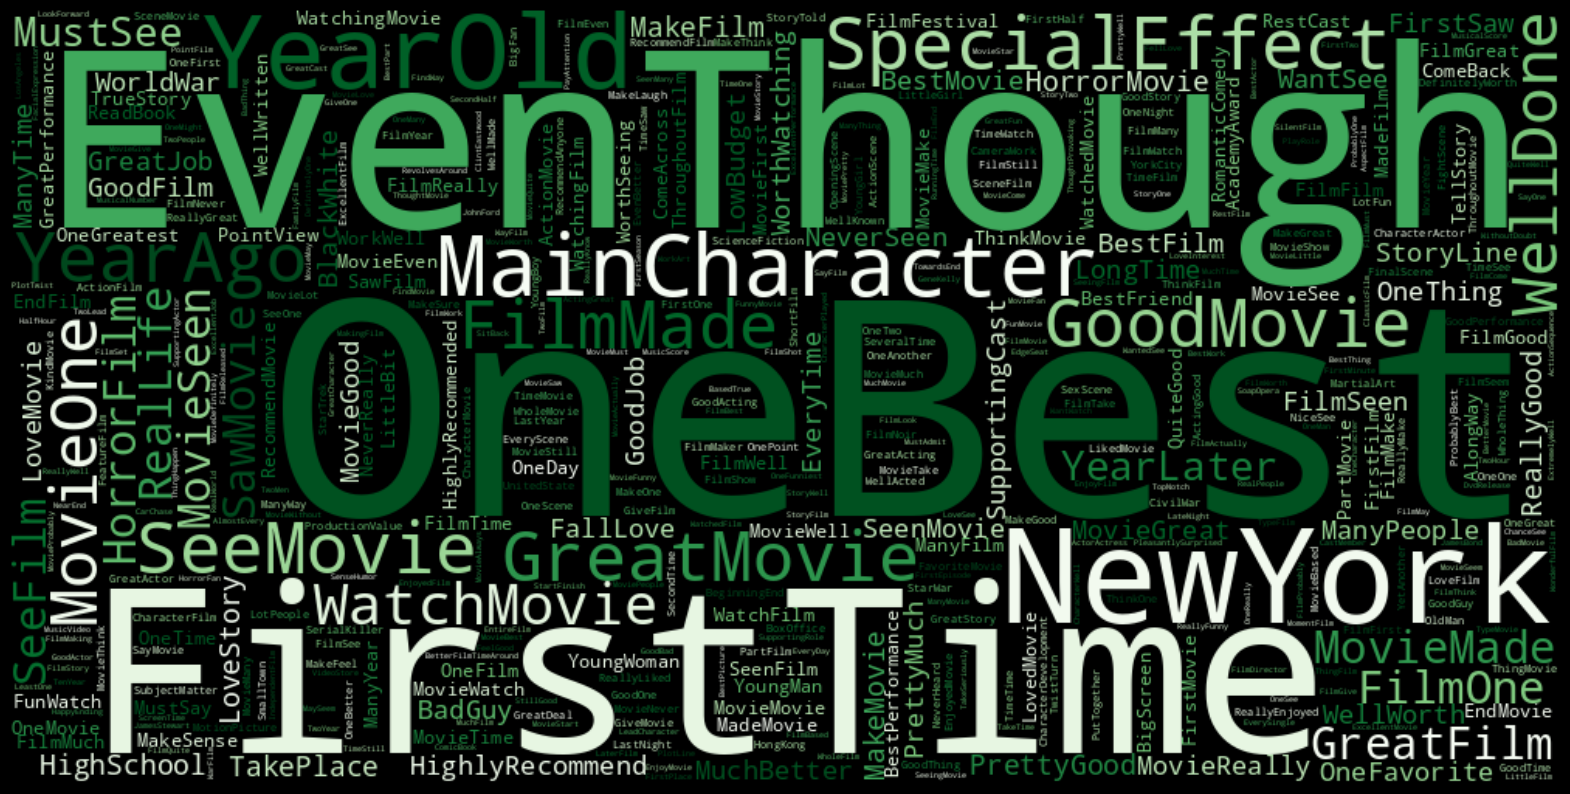

In [42]:
# Создаем облако слов для положительных биграмм
gen_wordcloud(1000, 'Greens', pos_bigrams, 'pos_bigrams')

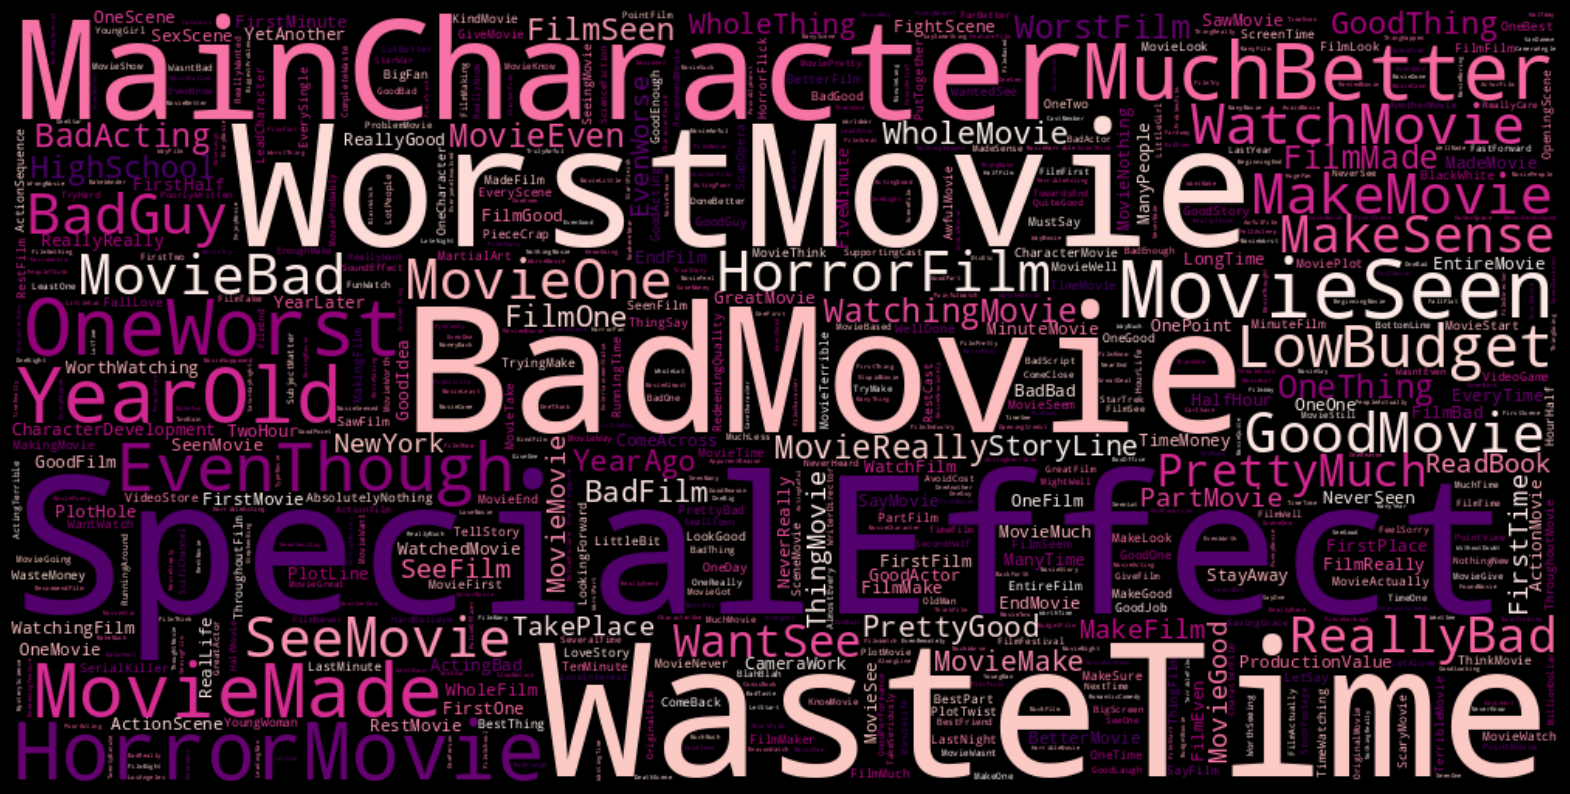

In [43]:
# Создаем облако слов для отрицательных биграмм
gen_wordcloud(1000, 'RdPu_r', neg_bigrams, 'neg_bigrams')

In [44]:
# Применяем функцию опеределения частоты n-грамм для триграмм
pos_trigrams= ngrams_freq(pos_rev, name='trigram', n_grams=3)
neg_trigrams= ngrams_freq(neg_rev, name='trigram', n_grams=3)

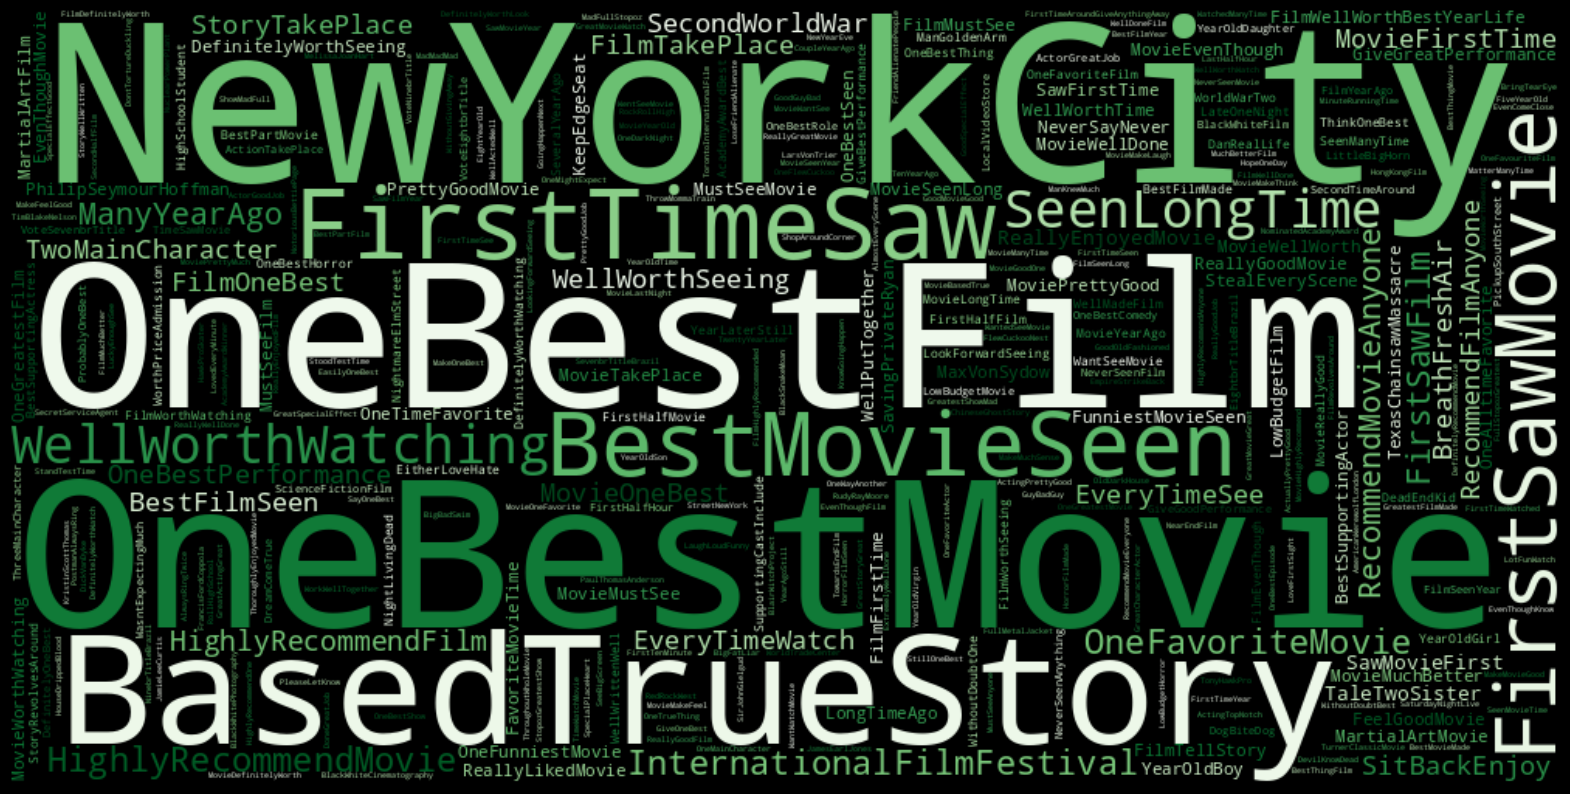

In [45]:
# Создаем облако слов для положительных триграмм
gen_wordcloud(500, 'Greens', pos_trigrams, 'pos_trigrams')

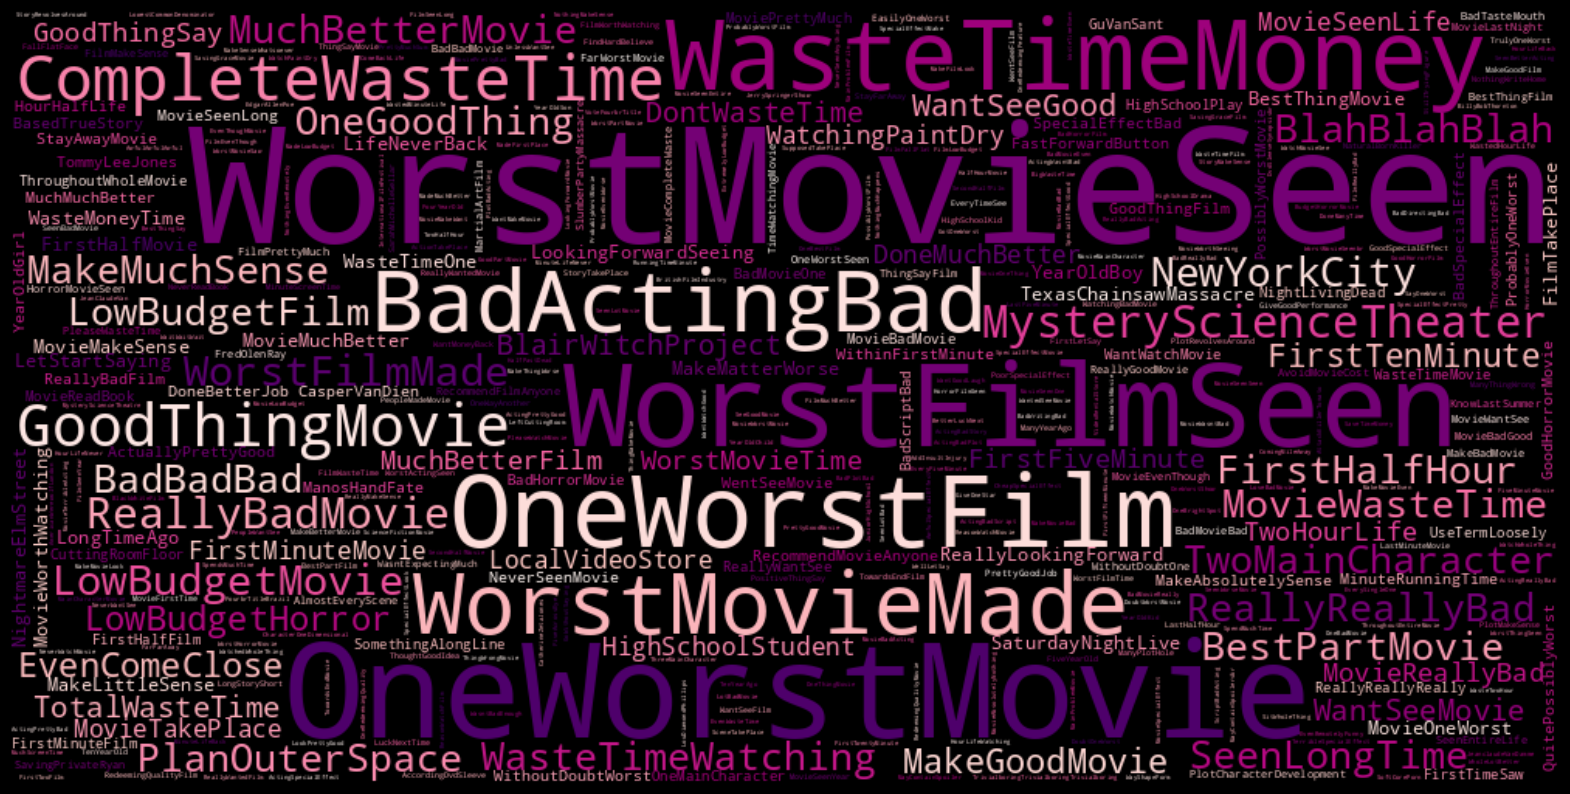

In [46]:
# Создаем облако слов для отрицательных триграмм
gen_wordcloud(500, 'RdPu_r', neg_trigrams, 'neg_trigrams')

In [47]:
# разделяем данные на тренировочную выборку (70%) и временную выборку (30%)
X_train, X_temp, y_train, y_temp = train_test_split(imdb.review, imdb.sentiment,
                                                    random_state=42, test_size=0.3,
                                                    stratify=imdb.sentiment)

# разделяем временную выборку на валидационную и тестовую
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, random_state=42,
                                                test_size=0.5, stratify=y_temp)

In [48]:
# Токенизатор предобученной модели BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [49]:
max_len= 200  # максимальная длина отзыва
# токенизация и кодировка предложений всех трех выборок
X_train_encoded = tokenizer.batch_encode_plus(X_train.tolist(),
                                              padding=True,
                                              truncation=True,
                                              max_length = max_len,
                                              return_tensors='tf')

X_val_encoded = tokenizer.batch_encode_plus(X_val.tolist(),
                                              padding=True,
                                              truncation=True,
                                              max_length = max_len,
                                              return_tensors='tf')

X_test_encoded = tokenizer.batch_encode_plus(X_test.tolist(),
                                              padding=True,
                                              truncation=True,
                                              max_length = max_len,
                                              return_tensors='tf')

In [50]:
# Инициализируем модель предобученную BERT под названием bert-base-uncased с 2 этикетками
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [78]:
# Compile the model with an appropriate optimizer, loss function, and metrics
import keras
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=[metric])

AttributeError: 'Variable' object has no attribute '_distribute_strategy'

In [ ]:
# Обучение модели на тренировочных данных
history = model.fit(
    [X_train_encoded['input_ids'], X_train_encoded['token_type_ids'],
     X_train_encoded['attention_mask']], y_train,  # тренировочные данные
    validation_data=([X_val_encoded['input_ids'], X_val_encoded['token_type_ids'],
                      X_val_encoded['attention_mask']],y_val),  # проверочные данные
    batch_size=32,  # размер выборки
    epochs=3)  # количество эпох обучения

In [ ]:
# Тестирование модели на тестовых данных
test_loss, test_accuracy = model.evaluate(
    [X_test_encoded['input_ids'], X_test_encoded['token_type_ids'],
     X_test_encoded['attention_mask']], y_test)
print(f'Потери (loss) на тестовой выборке: {test_loss}, точность (accuracy) на тестовой выборке: {test_accuracy}')

In [ ]:
# Путь сохранения предобученного токенизатора на Google-Drive
tokenizer.save_pretrained('/content/Tokenizer')

# Путь для сохранения модели на Google-Drive
model.save_pretrained('/content/Model')

In [ ]:
# Загрузка токенизатора с Google-диска
bert_tokenizer = BertTokenizer.from_pretrained('/content/Tokenizer')

# Загрузка модели с Google-Drive
bert_model = TFBertForSequenceClassification.from_pretrained('/content/Model')

In [ ]:
pred = bert_model.predict(
    [X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], X_test_encoded['attention_mask']])

# pred is of type TFSequenceClassifierOutput
logits = pred.logits

# Use argmax along the appropriate axis to get the predicted labels
pred_labels = tf.argmax(logits, axis=1)

# Convert the predicted labels to a NumPy array
pred_labels = pred_labels.numpy()

label = {1: 'Положительный', 0: 'Отрицательный'}

# Map the predicted labels to their corresponding strings using the label dictionary
pred_labels = [label[i] for i in pred_labels]
real_labels = [label[i] for i in y_test]

print('Предсказанные классы:', pred_labels[:10])
print('Реальные классы     :', real_labels[:10])

In [ ]:
print("Classification Report: \n", classification_report(Actual, pred_labels))

In [ ]:
def Get_sentiment(Review, Tokenizer=bert_tokenizer, Model=bert_model):
    # Convert Review to a list if it's not already a list
    if not isinstance(Review, list):
        Review = [Review]

    Input_ids, Token_type_ids, Attention_mask = Tokenizer.batch_encode_plus(Review,
                                                                             padding=True,
                                                                             truncation=True,
                                                                             max_length=128,
                                                                             return_tensors='tf').values()
    prediction = Model.predict([Input_ids, Token_type_ids, Attention_mask])

    # Use argmax along the appropriate axis to get the predicted labels
    pred_labels = tf.argmax(prediction.logits, axis=1)

    # Convert the TensorFlow tensor to a NumPy array and then to a list to get the predicted sentiment labels
    pred_labels = [label[i] for i in pred_labels.numpy().tolist()]
    return pred_labels

In [ ]:
Review ='''Bahubali is a blockbuster Indian movie that was released in 2015.
It is the first part of a two-part epic saga that tells the story of a legendary hero who fights for his kingdom and his love.
The movie has received rave reviews from critics and audiences alike for its stunning visuals,
spectacular action scenes, and captivating storyline.'''
Get_sentiment(Review)